In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv("C:/Users/animesh.ghosh/Desktop/Project/dataset/ml-latest-small/movies.csv")
links = pd.read_csv("C:/Users/animesh.ghosh/Desktop/Project/dataset/ml-latest-small/links.csv")
rating = pd.read_csv("C:/Users/animesh.ghosh/Desktop/Project/dataset/ml-latest-small/ratings.csv")
tags = pd.read_csv("C:/Users/animesh.ghosh/Desktop/Project/dataset/ml-latest-small/tags.csv")

In [103]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [104]:
len(movies)

9742

In [105]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None


No Missing Values found

In [106]:
genre = list(set(list(set(('|'.join(list(movies.iloc[:,2]))).split('|')))))
genre.sort()
print(genre)

['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [107]:
genreDict = {}
iGenerDict = {}
ind = 0
for i in genre:
    genreDict.update({ i : ind })
    iGenerDict.update({ ind : i })
    ind += 1
    
print("Genre Dictionary : \n")
print(genreDict)

print("\n\nIndex Dictionary : \n")
print(iGenerDict)

Genre Dictionary : 

{'(no genres listed)': 0, 'Action': 1, 'Adventure': 2, 'Animation': 3, 'Children': 4, 'Comedy': 5, 'Crime': 6, 'Documentary': 7, 'Drama': 8, 'Fantasy': 9, 'Film-Noir': 10, 'Horror': 11, 'IMAX': 12, 'Musical': 13, 'Mystery': 14, 'Romance': 15, 'Sci-Fi': 16, 'Thriller': 17, 'War': 18, 'Western': 19}


Index Dictionary : 

{0: '(no genres listed)', 1: 'Action', 2: 'Adventure', 3: 'Animation', 4: 'Children', 5: 'Comedy', 6: 'Crime', 7: 'Documentary', 8: 'Drama', 9: 'Fantasy', 10: 'Film-Noir', 11: 'Horror', 12: 'IMAX', 13: 'Musical', 14: 'Mystery', 15: 'Romance', 16: 'Sci-Fi', 17: 'Thriller', 18: 'War', 19: 'Western'}


In [108]:
def convertToIndex(list_genre):
    list_genre = list_genre.split('|')
    res = [0 for i in range(len(genre))]
    for i in list_genre:
        res[genreDict[i]]=1
    st = ''
    for i in res:
        st+=str(i)
    return st

In [109]:
ind = convertToIndex("Animation|Sci-Fi")
indb = int(ind,2)
indh = hex(indb)
indh

'0x10008'

In [110]:
def convertToGenre(list_index):
    gen = []
    pos = -1
    for i in list_index:
        pos += 1
        if i!='0':
            gen.append(iGenerDict[pos])
            
    return '|'.join(gen)

In [111]:
convertToGenre("00010000000000001000")

'Animation|Sci-Fi'

In [112]:
mod1_moviesdf = pd.DataFrame({"movieID":movies.iloc[:,0],"title":movies.iloc[:,1],"genre":[convertToIndex(i) for i in movies.iloc[:,2]]})

In [113]:
mod1_moviesdf.head()

,movieID,title,genre
0,1,Toy Story (1995),00111100010000000000
1,2,Jumanji (1995),00101000010000000000
2,3,Grumpier Old Men (1995),00000100000000010000
3,4,Waiting to Exhale (1995),00000100100000010000
4,5,Father of the Bride Part II (1995),00000100000000000000


In [114]:
len(movies)

9742

In [115]:
len(mod1_moviesdf)

9742

In [116]:
mod2_moviesdf = pd.DataFrame({"movieID":movies.iloc[:,0],"title":movies.iloc[:,1]})

In [117]:
moviesList = set(mod2_moviesdf.iloc[:,1])
len(moviesList)

9737

In [118]:
# for i in range(len(movies)):
#     for j in range(i+1,len(movies)):
#         if i!=j:
#             if movies.iloc[i,1] == movies.iloc[j,1]:
#                 print(movies.iloc[i,1])
#                 break

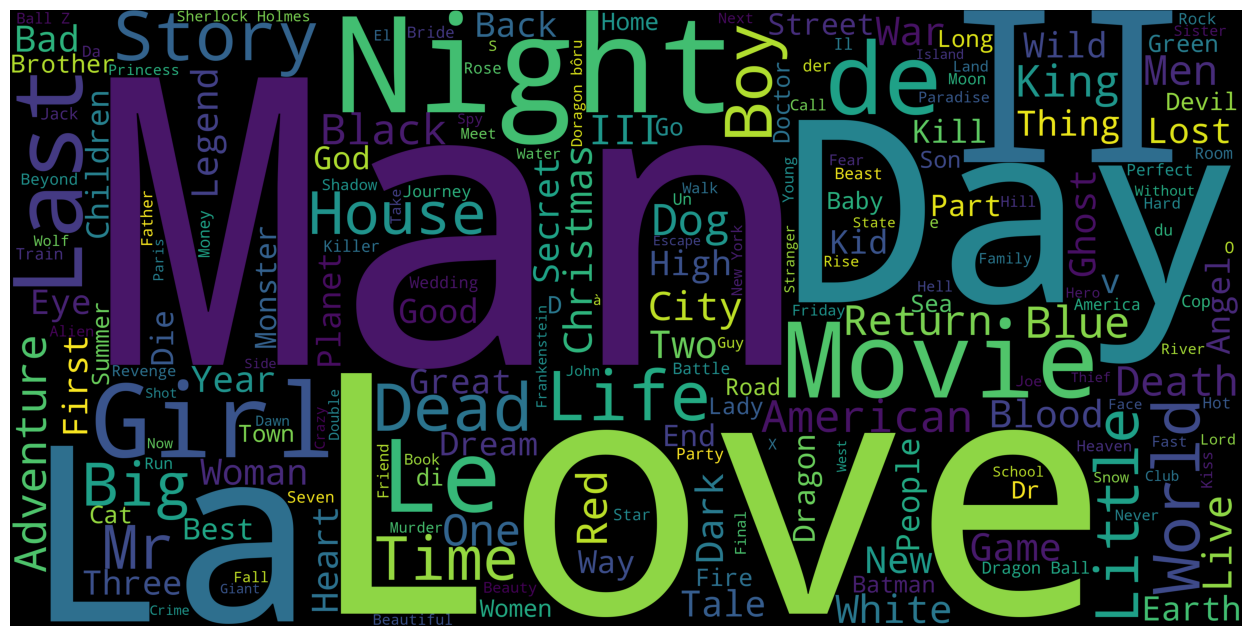

In [19]:
# Import new libraries
# %matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [119]:
j = 0
for i in movies['title']:
    print(i)
    j+=1
    if j==10:
        break;
    

Toy Story (1995)
Jumanji (1995)
Grumpier Old Men (1995)
Waiting to Exhale (1995)
Father of the Bride Part II (1995)
Heat (1995)
Sabrina (1995)
Tom and Huck (1995)
Sudden Death (1995)
GoldenEye (1995)


In [120]:
duplicated_values1 = movies.duplicated(subset = "title",keep = False )
duplicated_values2 = movies.duplicated(subset = "title",keep = "first" )
duplicated_values3 = movies.duplicated(subset = "title",keep = "last" )

In [121]:
duplicated_movies1 = movies[duplicated_values1]
duplicated_movies2 = movies[duplicated_values2]
duplicated_movies3 = movies[duplicated_values3]

In [122]:
duplicated_movies1

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5601,26958,Emma (1996),Romance
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [123]:
duplicated_movies2

,movieId,title,genres
5601,26958,Emma (1996),Romance
6932,64997,War of the Worlds (2005),Action|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Sci-Fi|Thriller


In [124]:
duplicated_movies3

,movieId,title,genres
650,838,Emma (1996),Comedy|Drama|Romance
2141,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
4169,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
5854,32600,Eros (2004),Drama
5931,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller


In [125]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [126]:
len(links)

9742

In [127]:
list1 = list(duplicated_movies2["genres"])
for i in list1:print(i)

Romance
Action|Sci-Fi
Comedy|Crime|Drama|Romance|Thriller
Drama|Romance
Sci-Fi|Thriller


In [128]:
list2 = list(duplicated_movies3["genres"])
for i in list2:print(i)

Comedy|Drama|Romance
Adventure|Sci-Fi|Thriller
Comedy|Crime|Drama|Thriller
Drama
Action|Adventure|Sci-Fi|Thriller


In [129]:
combGenre = []
for i in range(len(list1)):
    a = (list1[i].split('|'))
    a.extend(list2[i].split('|'))
    combGenre.append('|'.join(set(a)))
    
for i in combGenre:print(i)

Comedy|Drama|Romance
Thriller|Action|Adventure|Sci-Fi
Comedy|Drama|Romance|Crime|Thriller
Drama|Romance
Thriller|Adventure|Action|Sci-Fi


In [130]:
pos = 0
for i in combGenre:
    duplicated_movies2.iloc[pos,2] = i
    pos += 1
    
duplicated_movies2

,movieId,title,genres
5601,26958,Emma (1996),Comedy|Drama|Romance
6932,64997,War of the Worlds (2005),Thriller|Action|Adventure|Sci-Fi
9106,144606,Confessions of a Dangerous Mind (2002),Comedy|Drama|Romance|Crime|Thriller
9135,147002,Eros (2004),Drama|Romance
9468,168358,Saturn 3 (1980),Thriller|Adventure|Action|Sci-Fi


In [132]:
rating1 = pd.DataFrame({"userId": rating["userId"],"title":rating["movieId"].replace(movies.set_index("movieId")["title"]),"rating":rating["rating"]})
rating1.head()

,userId,title,rating
0,1,Toy Story (1995),4.0
1,1,Grumpier Old Men (1995),4.0
2,1,Heat (1995),4.0
3,1,Seven (a.k.a. Se7en) (1995),5.0
4,1,"Usual Suspects, The (1995)",5.0


In [133]:
refined_dataset = rating1.groupby(by=['userId','title'], as_index=False).agg({"rating":"mean"})

refined_dataset.head()

,userId,title,rating
0,1,"13th Warrior, The (1999)",4.0
1,1,20 Dates (1998),4.0
2,1,"Abyss, The (1989)",4.0
3,1,"Adventures of Robin Hood, The (1938)",5.0
4,1,Alice in Wonderland (1951),5.0


In [134]:
num_users = len(refined_dataset['userId'].value_counts())
num_items = len(refined_dataset['title'].value_counts())
print('Unique number of users in the dataset: {}'.format(num_users))
print('Unique number of movies in the dataset: {}'.format(num_items))

Unique number of users in the dataset: 610
Unique number of movies in the dataset: 9719


In [135]:
rating_count_df = pd.DataFrame(refined_dataset.groupby(['rating']).size(), columns=['count'])
rating_count_df

,count
rating,
0.50,1370
1.00,2811
1.50,1791
2.00,7550
2.25,1
2.50,5549
3.00,20047
3.50,13134
4.00,26817


Text(0, 0.5, 'number of ratings')

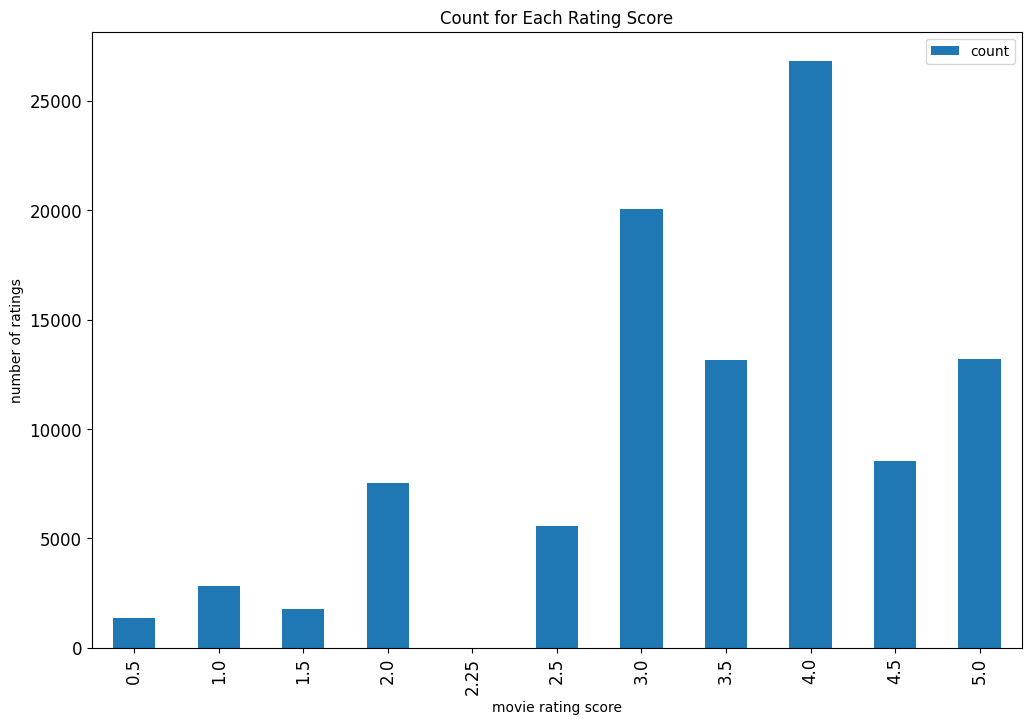

In [136]:
ax = rating_count_df.reset_index().rename(columns={'index': 'rating score'}).plot('rating','count', 'bar',
    figsize=(12, 8),
    title='Count for Each Rating Score',
    fontsize=12)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [137]:
total_count = num_items * num_users
zero_count = total_count-refined_dataset.shape[0]
zero_count

5827758

In [138]:
rating_count_df['log_count'] = np.log(rating_count_df['count'])
rating_count_df

,count,log_count
rating,,
0.50,1370,7.222566
1.00,2811,7.941296
1.50,1791,7.490529
2.00,7550,8.929303
2.25,1,0.000000
2.50,5549,8.621373
3.00,20047,9.905835
3.50,13134,9.482960
4.00,26817,10.196791


In [141]:
rating_count_df = rating_count_df.reset_index().rename(columns={'index': 'rating score'})
rating_count_df

,rating score,rating,count,log_count
0,0,0.50,1370,7.222566
1,1,1.00,2811,7.941296
2,2,1.50,1791,7.490529
3,3,2.00,7550,8.929303
4,4,2.25,1,0.000000
5,5,2.50,5549,8.621373
6,6,3.00,20047,9.905835
7,7,3.50,13134,9.482960
8,8,4.00,26817,10.196791
9,9,4.50,8551,9.053804


Text(0, 0.5, 'number of ratings')

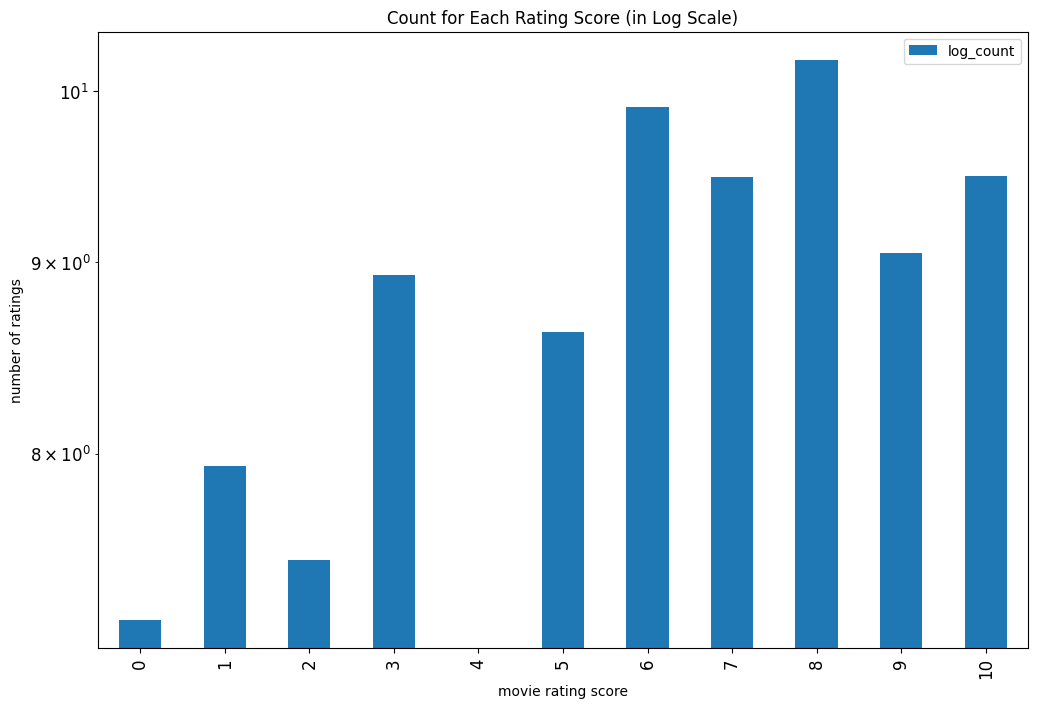

In [142]:
ax = rating_count_df.plot('rating score', 'log_count', 'bar', figsize=(12, 8),
    title='Count for Each Rating Score (in Log Scale)',
    logy=True,
    fontsize=12,)

ax.set_xlabel("movie rating score")
ax.set_ylabel("number of ratings")

In [143]:
refined_dataset.head()

,userId,title,rating
0,1,"13th Warrior, The (1999)",4.0
1,1,20 Dates (1998),4.0
2,1,"Abyss, The (1989)",4.0
3,1,"Adventures of Robin Hood, The (1938)",5.0
4,1,Alice in Wonderland (1951),5.0


In [145]:
#frequency
movies_count_df = pd.DataFrame(refined_dataset.groupby('title').size(), columns=['count'])
movies_count_df.head()

,count
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2


Text(0, 0.5, 'number of ratings')

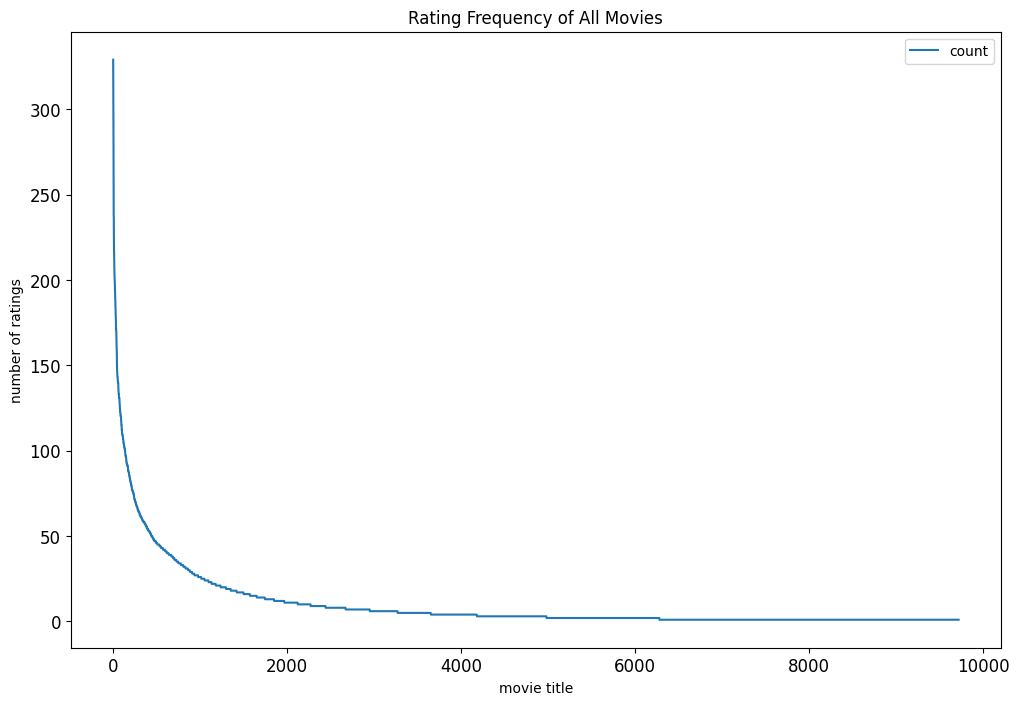

In [146]:
ax = movies_count_df \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All Movies',
        fontsize=12
    )
ax.set_xlabel("movie Id")
ax.set_ylabel("number of ratings")

# Knn 

In [147]:
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [148]:

user_to_movie_df = refined_dataset.pivot(
    index='userId',
     columns='title',
      values='rating').fillna(0)

user_to_movie_df.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
user_to_movie_sparse_df = csr_matrix(user_to_movie_df.values)
user_to_movie_sparse_df
     

<610x9719 sparse matrix of type '<class 'numpy.float64'>'
	with 100832 stored elements in Compressed Sparse Row format>

In [150]:
knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(user_to_movie_sparse_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [151]:
def get_similar_users(user, n = 5):
  ## input to this function is the user and number of top similar users you want.

  knn_input = np.asarray([user_to_movie_df.values[user-1]])  #.reshape(1,-1)
  # knn_input = user_to_movie_df.iloc[0,:].values.reshape(1,-1)
  distances, indices = knn_model.kneighbors(knn_input, n_neighbors=n+1)
  
  print("Top",n,"users who are very much similar to the User-",user, "are: ")
  print(" ")
  for i in range(1,len(distances[0])):
    print(i,". User:", indices[0][i]+1, "separated by distance of",distances[0][i])
  return indices.flatten()[1:] + 1, distances.flatten()[1:]

In [4]:
from pprint import pprint
user_id = 510
print(" Few of movies seen by the User:")
pprint(list(refined_dataset[refined_dataset['userId'] == user_id]['title'])[:10])
similar_user_list, distance_list = get_similar_users(user_id,5)

 Few of movies seen by the User:


NameError: name 'refined_dataset' is not defined

In [154]:
similar_user_list, distance_list

(array([494, 231, 183, 549, 577], dtype=int64),
 array([0.64115235, 0.64847266, 0.6524752 , 0.68992978, 0.69177746]))

In [155]:
weightage_list = distance_list/np.sum(distance_list)
weightage_list

array([0.19289696, 0.19509935, 0.19630355, 0.20757213, 0.20812802])

In [156]:
mov_rtngs_sim_users = user_to_movie_df.values[similar_user_list]
mov_rtngs_sim_users


array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 2.5, 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [157]:
movies_list = user_to_movie_df.columns
movies_list

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [94]:
#rough work
#making new DataFrame where we replace movieId by title
rating1 = pd.DataFrame({"userId": rating["userId"],"title":rating["movieId"].replace(movies.set_index("movieId")["title"]),"rating":rating["rating"]})
rating1.info()
rating1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   userId  100836 non-null  int64  
 1   title   100836 non-null  object 
 2   rating  100836 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


,userId,title,rating
0,1,Toy Story (1995),4.0
1,1,Grumpier Old Men (1995),4.0
2,1,Heat (1995),4.0
3,1,Seven (a.k.a. Se7en) (1995),5.0
4,1,"Usual Suspects, The (1995)",5.0
